# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations
* As expected, lattitude Vs Max temp graph suggests that the closer you are to the equator (lattitude 0) the hotter it will be. As one moves away from the equator the temperatures decrease.
* The graphs display no strong correlation between latitude and cloudiness as well as humidity and lattitude
* There strongest relationship is between latitude and max temperature and in particular for the Southern Hemisphere. The linear regression line can be utilised to predict the max temps based on a countries lattitude.

In [290]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Citypy import
from citipy import citipy

# Output File (CSV)
output_data_file = "../Part I - WeatherPy/Output Data/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [291]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("{} cities have been identified".format(len(cities)))

584 cities have been identified


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [292]:
#URL for Weather Map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Cities weather data frame
Cities_df = pd.DataFrame({"City":cities})
Cities_df["Lat"]=""
Cities_df["Lng"]=""
Cities_df["Max Temp"] =""
Cities_df["Humidity"] =""
Cities_df["Cloudiness"] =""
Cities_df["Wind Speed"] =""
Cities_df["Country"] =""
Cities_df["Date"] =""


Cities_df.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_df.iterrows():
    city =row["City"]
    response = requests.get(query_url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    
    try:
        Cities_df.loc[index,"Lat"]=city_weather['coord']['lat']        
        Cities_df.loc[index,"Lng"]=city_weather["coord"]['lon']
        Cities_df.loc[index,"Max Temp"]=city_weather['main']['temp']
        Cities_df.loc[index,"Humidity"]=city_weather['main']['humidity']
        Cities_df.loc[index,"Cloudiness"]=city_weather['clouds']['all']
        Cities_df.loc[index,"Wind Speed"]=city_weather['wind']['speed']
        Cities_df.loc[index,"Country"]=city_weather["sys"]["country"]
        Cities_df.loc[index,"Date"]=city_weather["dt"]
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_df)

Beginning Data Retrieval
------------------------
Processing Record 0 | astorga
Processing Record 1 | victor harbor
Processing Record 2 | nikolskoye
Processing Record 3 | ushuaia
Processing Record 4 | barrow
Processing Record 5 | busselton
Processing Record 6 | maykain
City not found... skipping.
Processing Record 7 | bethel
Processing Record 8 | manicore
Processing Record 9 | kodiak
Processing Record 10 | mataura
Processing Record 11 | pampierstad
Processing Record 12 | saskylakh
Processing Record 13 | albany
Processing Record 14 | atuona
Processing Record 15 | atar
Processing Record 16 | rikitea
Processing Record 17 | yerbogachen
Processing Record 18 | codrington
Processing Record 19 | beringovskiy
Processing Record 20 | port elizabeth
Processing Record 21 | aksu
Processing Record 22 | hermanus
Processing Record 23 | punta arenas
Processing Record 24 | tabiauea
City not found... skipping.
Processing Record 25 | saint-pierre
Processing Record 26 | buqayq
City not found... skipping.
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [310]:
Cities_df.to_csv(output_data_file)

In [293]:
# Drop blank cities
Cities_df.replace("", np.nan, inplace = True)
Citiesclean_df = Cities_df.dropna()

# Display  data frame
Citiesclean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,astorga,-23.2325,-51.6656,79.03,31.0,91.0,14.43,BR,1.657900e+09
1,victor harbor,-35.5667,138.6167,54.00,56.0,100.0,16.17,AU,1.657900e+09
2,nikolskoye,59.7035,30.7861,65.98,58.0,100.0,5.75,RU,1.657900e+09
3,ushuaia,-54.8000,-68.3000,35.26,55.0,20.0,8.05,AR,1.657900e+09
4,barrow,71.2906,-156.7887,33.82,86.0,100.0,11.50,US,1.657900e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [294]:
# Cities with >100% humidity
Cityhumid_df = Citiesclean_df[Citiesclean_df["Humidity"] > 100]

Cityhumid_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [295]:
#Describe function to verify max humidity in data
Cityhumiditycheck = Citiesclean_df["Humidity"]

# Print number of Cities with >100% humidity
print("No cities with humidity above 100%")

Cityhumiditycheck.describe()


No cities with humidity above 100%


count    537.000000
mean      66.929236
std       22.856517
min        1.000000
25%       55.000000
50%       72.000000
75%       84.000000
max       99.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

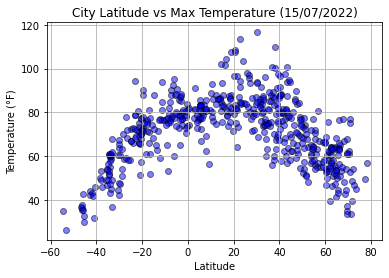

In [296]:
#Create scatter
plt.scatter(Citiesclean_df["Lat"], Citiesclean_df["Max Temp"], 
facecolors="blue", 
marker="o",
alpha=0.5, 
edgecolor="black")

plt.title("City Latitude vs Max Temperature (15/07/2022)")
plt.ylabel("Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Part I - WeatherPy/Images/Latitude_vs_Max_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

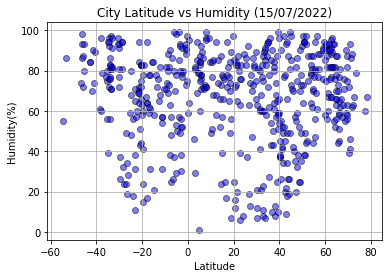

In [297]:
#Create scatter
plt.scatter(Citiesclean_df["Lat"], Citiesclean_df["Humidity"],
facecolors="blue",
marker="o",
alpha=0.5, 
edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity (15/07/2022)')
plt.grid(True)

plt.savefig("../Part I - WeatherPy/Images/Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

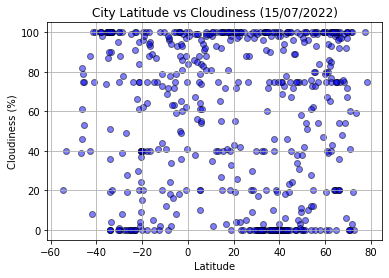

In [298]:
#Create scatter
plt.scatter(Citiesclean_df["Lat"], Citiesclean_df["Cloudiness"],
facecolors="blue",
marker="o",
alpha=0.5, 
edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness (15/07/2022)')
plt.grid(True)

plt.savefig("../Part I - WeatherPy/Images/Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

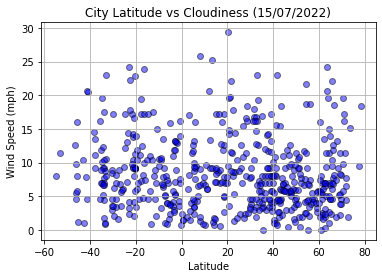

In [299]:
#Create scatter
plt.scatter(Citiesclean_df["Lat"], Citiesclean_df["Wind Speed"],
facecolors="blue",
marker="o",
alpha=0.5, 
edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Cloudiness (15/07/2022)')
plt.grid(True)

plt.savefig("../Part I - WeatherPy/Images/Latitude_vs_Wind_Speed.png")

plt.show()

## Linear Regression

In [300]:
# Northern and Southern Hemisphere DataFrames
Northernhemis_df = Citiesclean_df.loc[Citiesclean_df["Lat"] >= 0.0]
Southernhemis_df = Citiesclean_df.loc[Citiesclean_df["Lat"] < 0.0]

In [301]:
# Function to plot linear regression
def plot_lr(x_values, y_values, title, label_pos, image):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r value is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values,
    facecolors="blue",
    marker="o",
    alpha=0.5, 
    edgecolor="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,label_pos,fontsize=11,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.savefig(f"../Part I - WeatherPy/Images/{image}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.6567375057898408


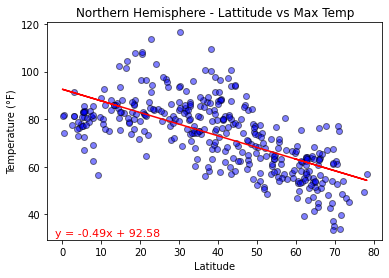

In [302]:
x_values = Northernhemis_df["Lat"]
y_values = Northernhemis_df["Max Temp"]
plt.title(f'Northern Hemisphere - Lattitude vs Max Temp')
plot_lr(x_values, y_values,"Temperature (°F)",(-2,31),"Northern_Hem_Max_Temp_vs_Lattitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.8235162109790809


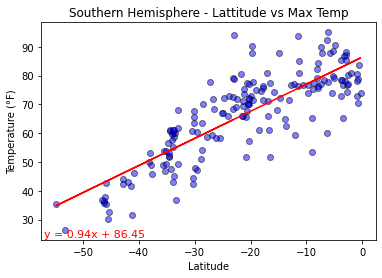

In [311]:
x_values = Southernhemis_df["Lat"]
y_values = Southernhemis_df["Max Temp"]
plt.title(f'Southern Hemisphere - Lattitude vs Max Temp')
plot_lr(x_values, y_values,"Temperature (°F)",(-57,24),"Southern_Hem_Max_Temp_vs_Lattitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.04644366346341675


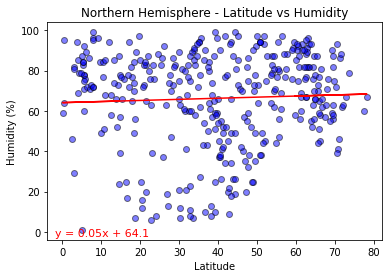

In [304]:
x_values = Northernhemis_df["Lat"]
y_values = Northernhemis_df["Humidity"]
plt.title(f'Northern Hemisphere - Latitude vs Humidity')
plot_lr(x_values, y_values,"Humidity (%)",(-2,-2),"Northern_Hem_Humidity_vs_Lattitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.14708159673674293


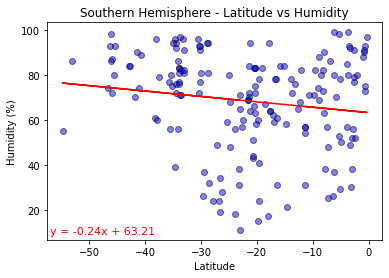

In [314]:
x_values = Southernhemis_df["Lat"]
y_values = Southernhemis_df["Humidity"]
plt.title(f'Southern Hemisphere - Latitude vs Humidity')
plot_lr(x_values, y_values,"Humidity (%)",(-57,9),"Southern_Hem_Humidity_vs_Lattitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.04365483608988211


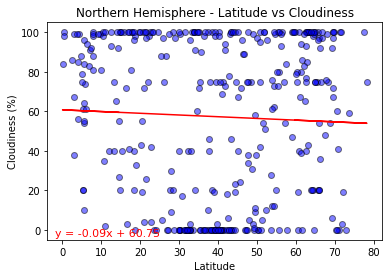

In [306]:
x_values = Northernhemis_df["Lat"]
y_values = Northernhemis_df["Cloudiness"]
plt.title(f'Northern Hemisphere - Latitude vs Cloudiness')
plot_lr(x_values, y_values,"Cloudiness (%)",(-2,-3),"Northern_Hem_Cloudiness_vs_Lattitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.02115460813863482


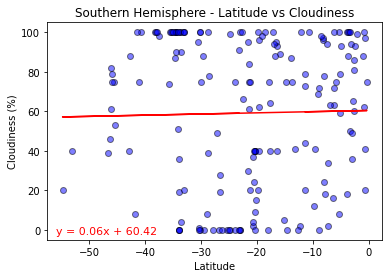

In [307]:
x_values = Southernhemis_df["Lat"]
y_values = Southernhemis_df["Cloudiness"]
plt.title(f'Southern Hemisphere - Latitude vs Cloudiness')
plot_lr(x_values, y_values,"Cloudiness (%)",(-56,-2),"Southern_Hem_Cloudiness_vs_Lattitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.05250353420911342


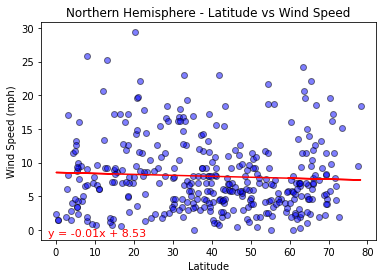

In [308]:
x_values = Northernhemis_df["Lat"]
y_values = Northernhemis_df["Wind Speed"]
plt.title(f'Northern Hemisphere - Latitude vs Wind Speed')
plot_lr(x_values, y_values,"Wind Speed (mph)",(-2,-1),"Northern_Hem_Wind_Speed_vs_Lattitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.08862200207547931


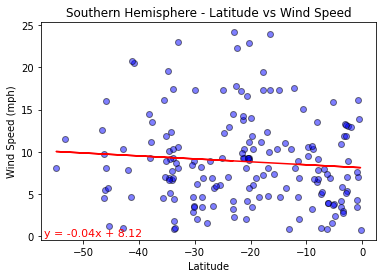

In [315]:
x_values = Southernhemis_df["Lat"]
y_values = Southernhemis_df["Wind Speed"]
plt.title(f'Southern Hemisphere - Latitude vs Wind Speed')
plot_lr(x_values, y_values,"Wind Speed (mph)",(-57,0),"Southern_Hem_Wind_Speed_vs_Lattitude")